In [82]:
# adding flags to reload modules without restarting the kernel
%load_ext autoreload
%autoreload 2

In [104]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd


In [47]:
df = pd.read_csv("../data/ERA5_Single_Level.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time').sort_index()
df.head()

,d2m,t2m,msl,tp,v10,u10,v100,u100,ttr,tcc,wind_speed_10,wind_speed_100
time,,,,,,,,,,,,
1998-12-31 21:00:00,291.047976,293.092144,101323.855318,0.000109,0.648034,-1.475597,1.009022,-2.811511,-873001.839211,0.495752,1.611625,2.987092
1998-12-31 22:00:00,291.102855,293.165837,101362.271230,0.000055,-0.232797,-1.384500,-0.376840,-2.811511,-876066.526497,0.638490,1.403935,2.836653
1998-12-31 23:00:00,291.094585,292.859418,101384.923973,0.000068,-0.927978,-0.960242,-1.950172,-2.811511,-904910.642133,0.667170,1.335368,3.421661
1999-01-01 00:00:00,290.857967,292.015647,101371.079419,0.000055,-1.210370,-0.514787,-2.980013,0.348545,-854472.070282,0.655588,1.315296,3.000327
1999-01-01 01:00:00,290.804592,291.947554,101300.243267,0.000035,-1.281291,-0.089466,-3.089207,0.348545,-833740.362168,0.716397,1.284411,3.108807


<Axes: xlabel='time'>

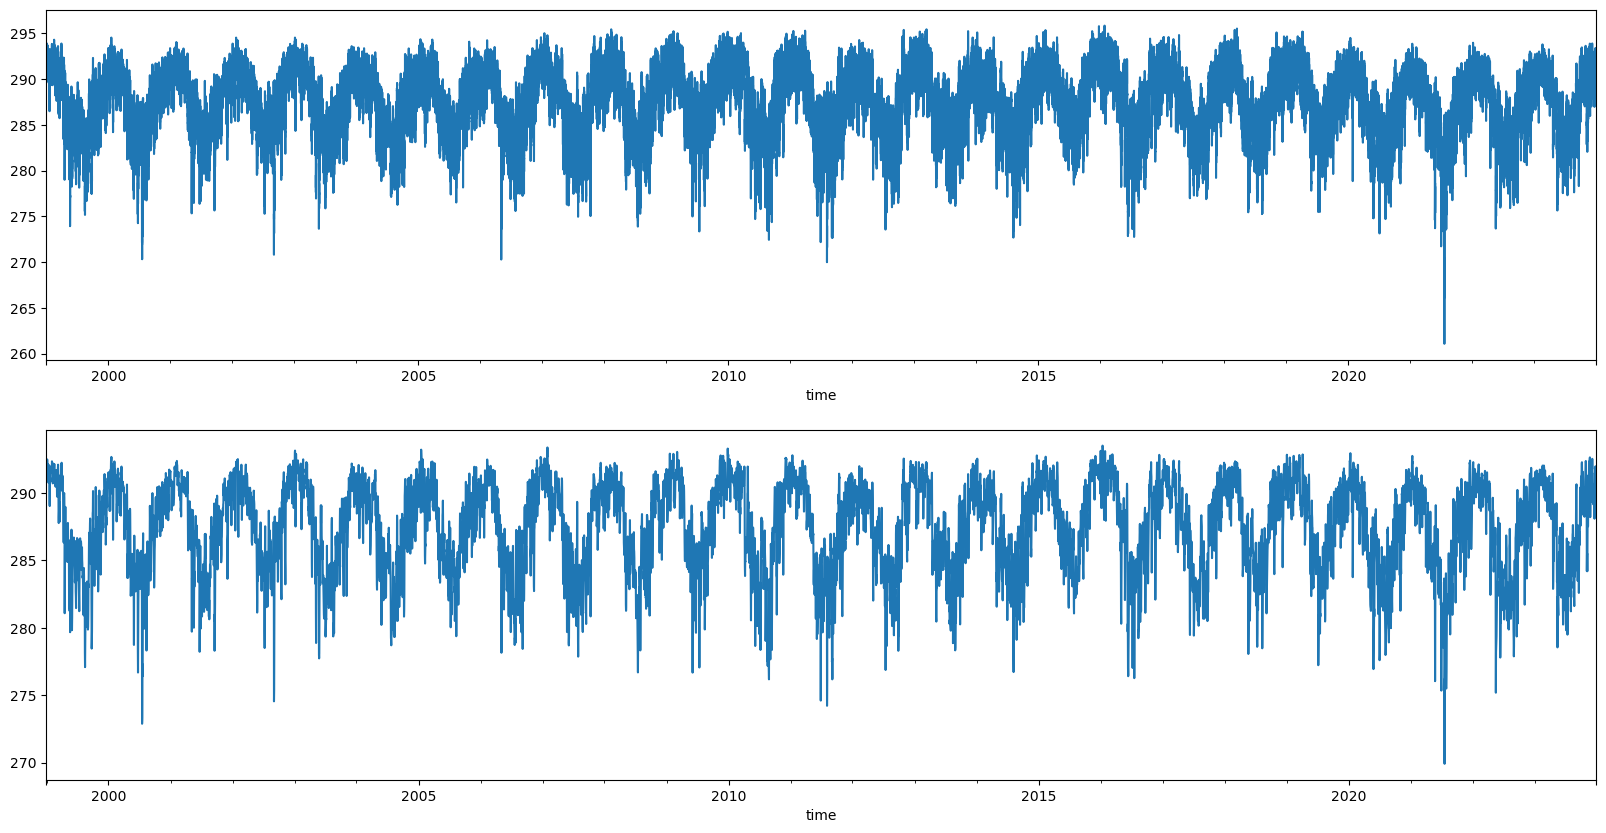

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
df['d2m'].plot(ax=ax[0])
df['d2m'].resample('D').mean().plot(ax=ax[1])

In [86]:
data_df = df['d2m'].resample('D').mean().dropna()
data_df.head()

time
1998-12-31    291.081805
1999-01-01    291.286372
1999-01-02    291.656139
1999-01-03    291.753962
1999-01-04    291.698183
Freq: D, Name: d2m, dtype: float64

In [87]:
data_df.shape

(9132,)

In [88]:
# CONTINUOUS WAVELET TRANSFORM
N = 9132         # the time series of length N.

dt = 1/365      # amount of time between each time series value, i.e. the sampling time.
                # seasonal data 1/4 year - 4 measures in 1 year
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'

In [99]:
data_norm = normalize(data_df.values)
data_norm

array([1.07539821, 1.1346932 , 1.24187269, ..., 0.90046785, 0.90662317,
       0.70763573])

In [105]:
result = cwt(
    data=data_norm, 
    dt=dt, 
    pad=pad, 
    dj=dj, 
    s0=s0, 
    j1=j1, 
    lag1=lag1, 
    param=param, 
    name='Temperature',
    mother='Morlet',
    J1=None
)

Nr of Scales: 48
scales [0.005479452054794521, 0.006516203369877923, 0.007749115410263535, 0.009215303180862625, 0.010958904109589041, 0.013032406739755847, 0.01549823082052707, 0.01843060636172525, 0.021917808219178082, 0.026064813479511693, 0.03099646164105414, 0.0368612127234505, 0.043835616438356165, 0.05212962695902339, 0.06199292328210828, 0.073722425446901, 0.08767123287671233, 0.10425925391804677, 0.12398584656421656, 0.147444850893802, 0.17534246575342466, 0.20851850783609355, 0.24797169312843312, 0.294889701787604, 0.3506849315068493, 0.4170370156721871, 0.49594338625686624, 0.589779403575208, 0.7013698630136986, 0.8340740313443742, 0.9918867725137325, 1.179558807150416, 1.4027397260273973, 1.6681480626887484, 1.983773545027465, 2.359117614300832, 2.8054794520547945, 3.3362961253774968, 3.96754709005493, 4.718235228601664, 5.610958904109589, 6.6725922507549935, 7.93509418010986, 9.436470457203328, 11.221917808219178, 13.345184501509987, 15.87018836021972, 18.872940914406655, 

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Temperature'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period/Yeas'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

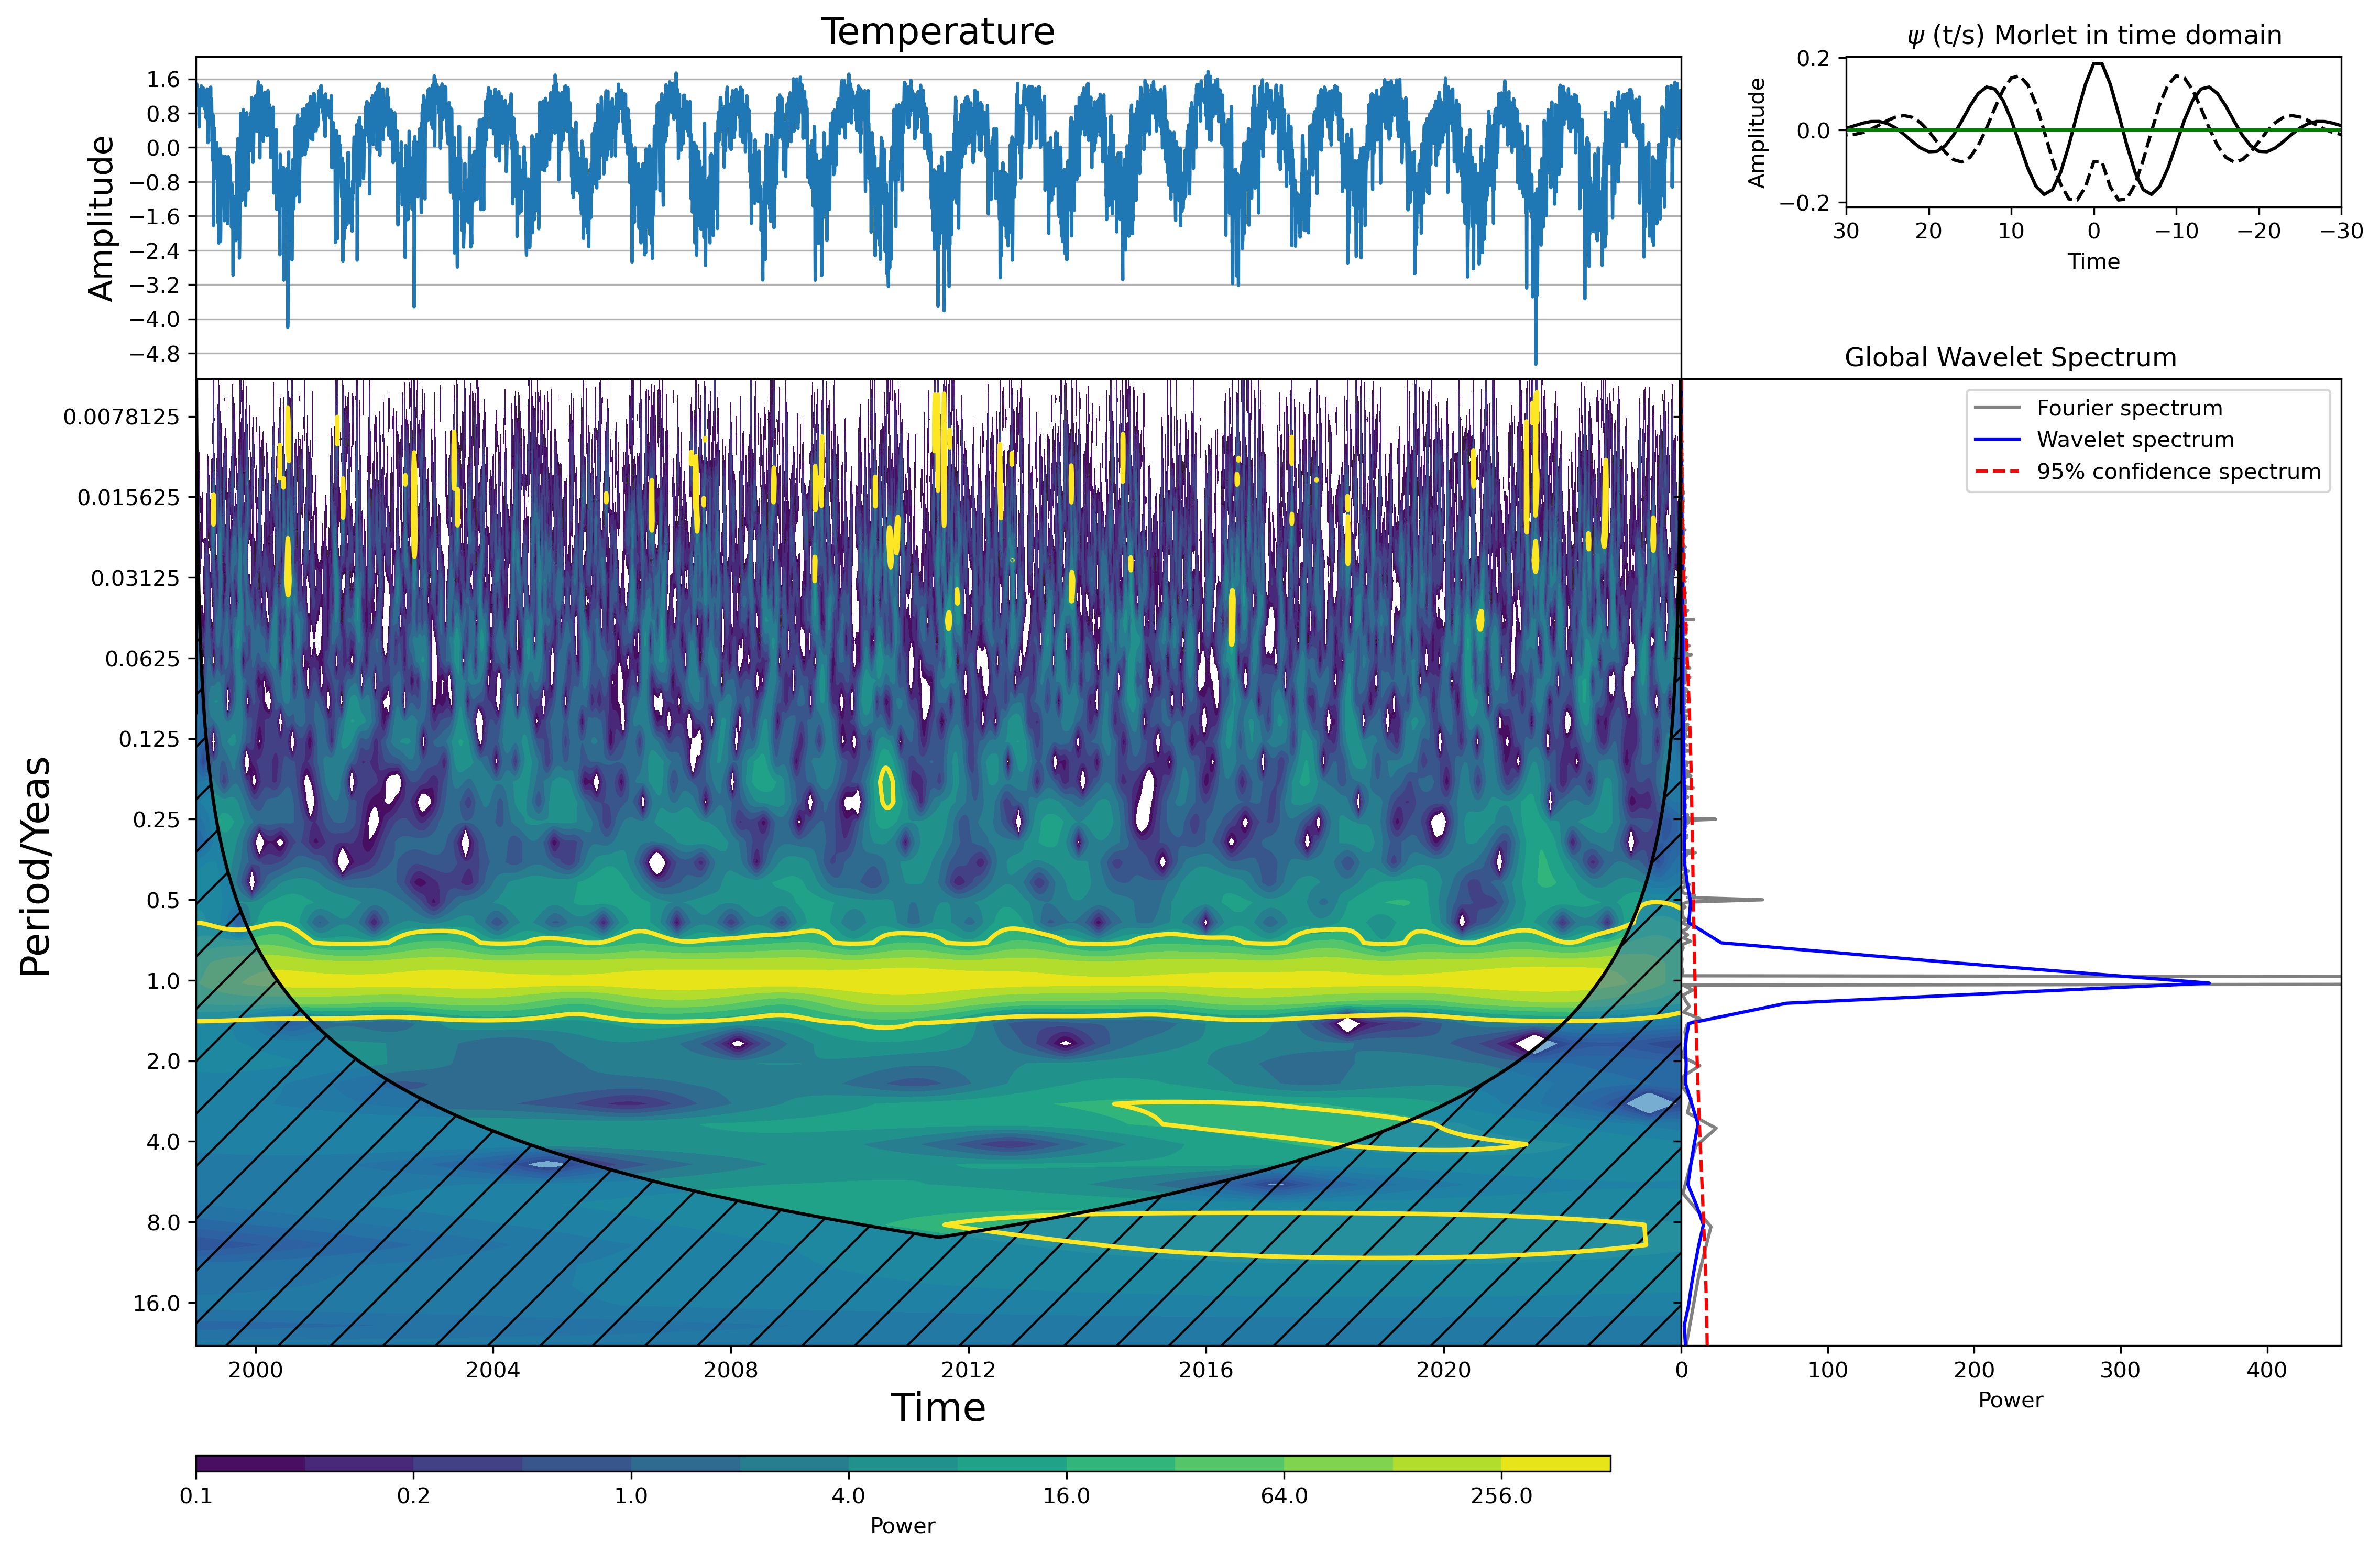

In [109]:
from waipy import *
dtmin = 0.25/8    # dt/n of suboctaves
wavelet_plot('Temperature', data_df.index, data_norm, dtmin, result)

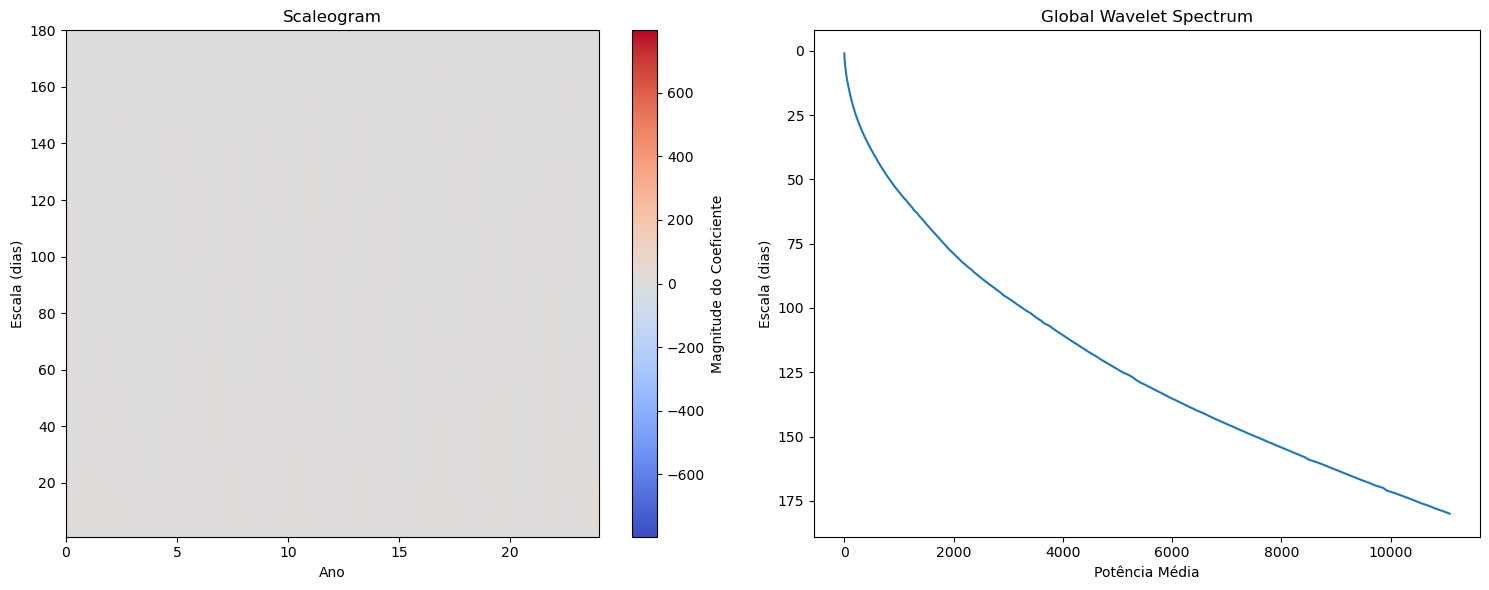

In [81]:
data = df['d2m'].resample('D').mean().dropna().values

wavelet = 'morl'
scales = np.arange(1, 1000)

coefficients, frequencies = pywt.cwt(data, scales, wavelet, sampling_period=1/365)

gws = np.mean(coefficients**2, axis=1)

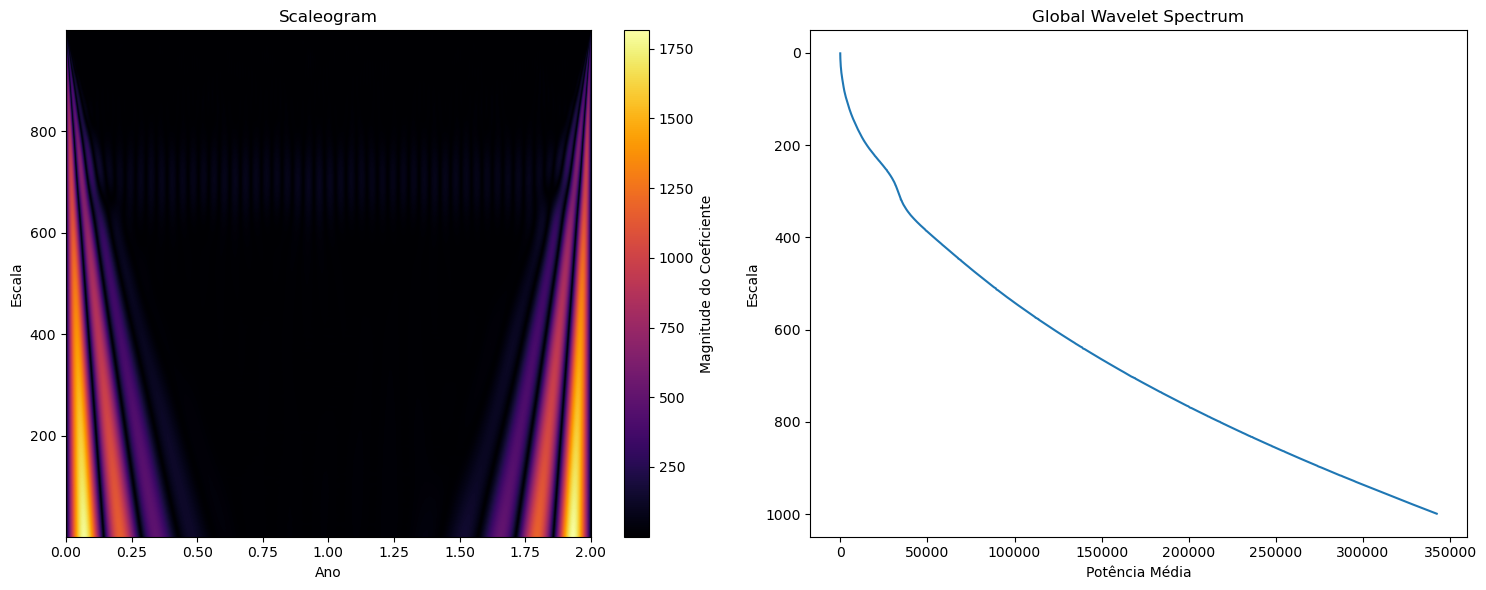

In [80]:

# Plotando o Scaleogram e GWS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scaleogram
cax = ax1.imshow(np.abs(coefficients), extent=[0, 2, scales[0], scales[-1]], cmap='inferno', aspect='auto')
fig.colorbar(cax, ax=ax1, orientation='vertical', label='Magnitude do Coeficiente')
ax1.set_title('Scaleogram')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Escala')

# Global Wavelet Spectrum
ax2.plot(gws, scales)
ax2.set_title('Global Wavelet Spectrum')
ax2.set_xlabel('Potência Média')
ax2.set_ylabel('Escala')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

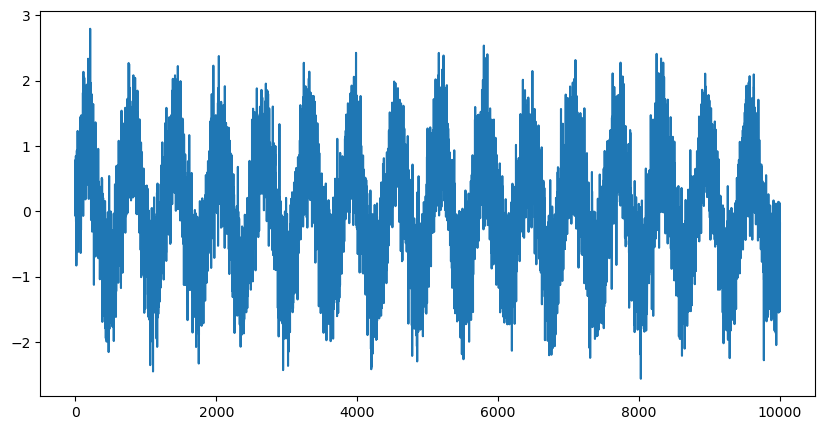

In [37]:
np.random.seed(42)
data = np.sin(np.linspace(0, 100, 10000))
data = data + np.random.normal(0, 0.5, 10000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(data)


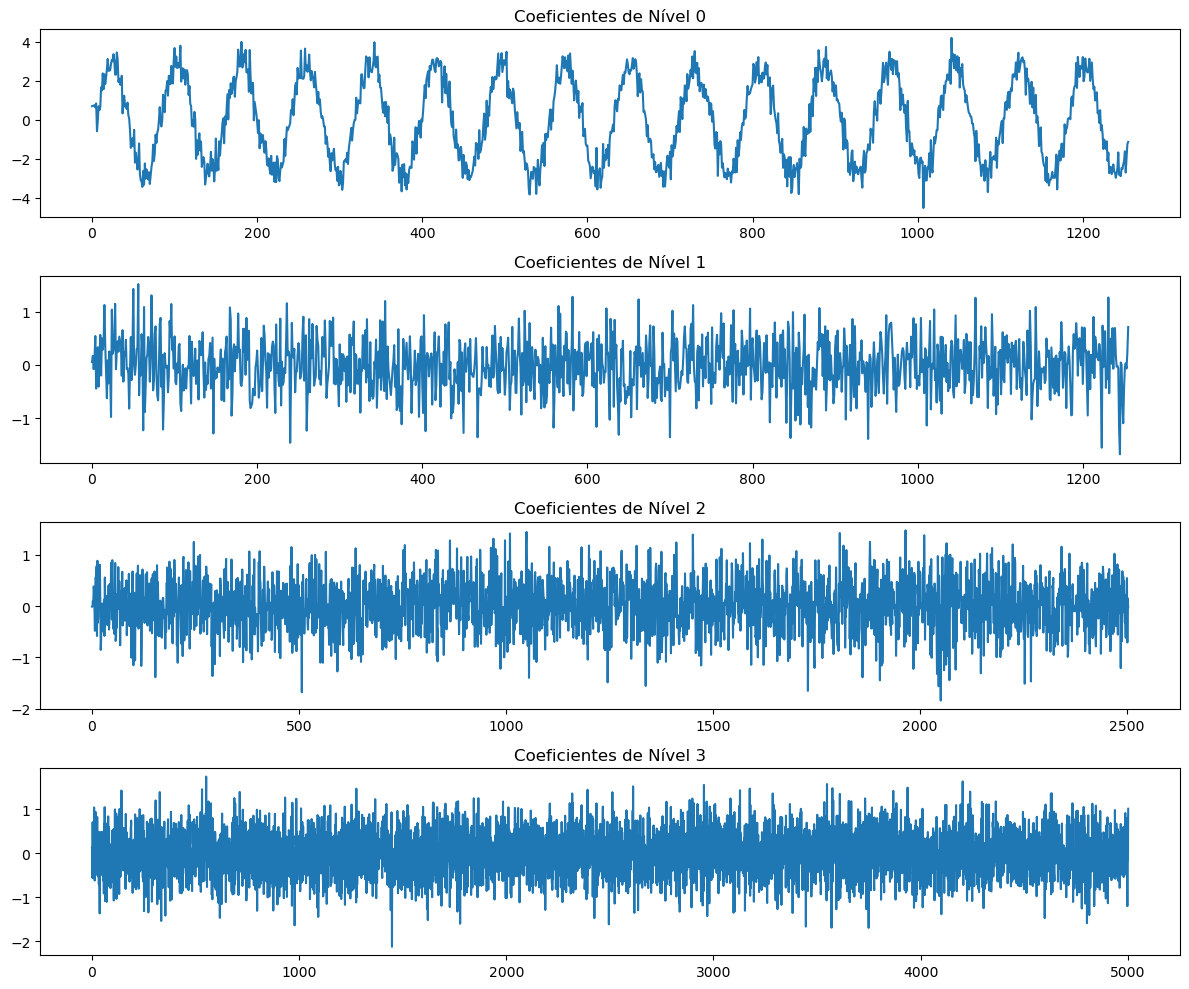

In [38]:
# Escolhendo o wavelet
wavelet = 'db4'  # Daubechies 4
n_levels = 3  # Número de níveis de decomposição

# Decomposição
coeffs = pywt.wavedec(data, wavelet, level=n_levels)

# Plotando os coeficientes
fig, axs = plt.subplots(n_levels + 1, 1, figsize=(12, 10))
for i, coef in enumerate(coeffs):
    axs[i].plot(coef)
    axs[i].set_title(f'Coeficientes de Nível {i}')
plt.tight_layout()
plt.show()


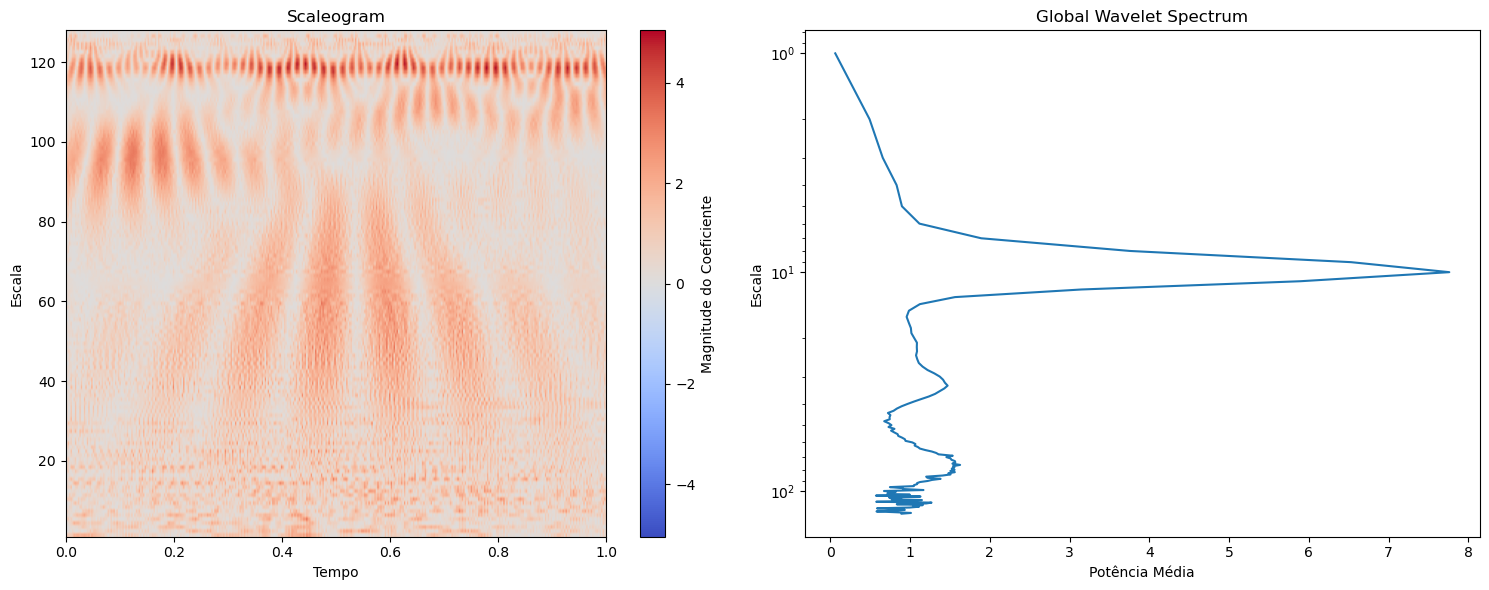

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Gerando dados de exemplo
t = np.linspace(0, 1, 365, endpoint=False)  # 365 dias
data = np.sin(2 * np.pi * 30 * t) + np.random.normal(0, 1, 365)  # Sinal com ruído

# Definindo o wavelet e as escalas
wavelet = 'morl'
scales = np.arange(1, 128)

# CWT
coefficients, frequencies = pywt.cwt(data, scales, wavelet, sampling_period=1/365)

# Calculando o Global Wavelet Spectrum
gws = np.mean(abs(coefficients)**2, axis=1)

# Plotando o Scaleogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scaleogram
cax = ax1.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='coolwarm', aspect='auto', vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
fig.colorbar(cax, ax=ax1, label='Magnitude do Coeficiente')
ax1.set_title('Scaleogram')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Escala')

# Global Wavelet Spectrum
ax2.plot(gws, scales)
ax2.set_title('Global Wavelet Spectrum')
ax2.set_xlabel('Potência Média')
ax2.set_ylabel('Escala')
ax2.set_yscale('log')  # Log scale pode ajudar na visualização dependendo das escalas
ax2.invert_yaxis()  # Inverte o eixo Y para corresponder ao scaleogram

plt.tight_layout()
plt.show()
